--------------------------
#### 2-sample 2 tailed t-test
---------------------------

- investigate whether there is a significant difference in the average fare between passengers who survived and those who did not survive the Titanic disaster. 

- This is done using a two-sample two-tailed t-test on the "Fare" column based on the "Survived" column as the grouping variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t

In [2]:
# Load Titanic dataset from seaborn
titanic_df = sns.load_dataset('titanic')

In [3]:
# Extract relevant columns
fare_survived = titanic_df[['fare', 'survived']]

In [4]:
# Split data into two groups based on 'survived' column
fare_survived_grouped = [group['fare'].dropna() for _, group in fare_survived.groupby('survived')]


In [5]:
fare_survived_grouped

[0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: fare, Length: 342, dtype: float64]

In [6]:
# Significance level
alpha = 0.05

In [7]:
# Perform two-sample two-tailed t-test
t_statistic, p_value = ttest_ind(*fare_survived_grouped, equal_var=False)

In [8]:
t_statistic, p_value 

(-6.839099259085254, 2.6993323503141236e-11)

In [11]:
# Print the results
print("Null Hypothesis (H0): There is no significant difference in the average fare between the 'Survived' and 'Not Survived' groups.")
print("Alternative Hypothesis (H1): There is a significant difference in the average fare between the 'Survived' and 'Not Survived' groups.")
print(f"Significance Level: {alpha}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Null Hypothesis (H0): There is no significant difference in the average fare between the 'Survived' and 'Not Survived' groups.
Alternative Hypothesis (H1): There is a significant difference in the average fare between the 'Survived' and 'Not Survived' groups.
Significance Level: 0.05
T-Statistic: -6.839099259085254
P-Value: 2.6993323503141236e-11


In [9]:
# Calculate critical values for two-tailed test
df_survived = len(fare_survived_grouped[0]) - 1
df_not_survived = len(fare_survived_grouped[1]) - 1
df_total = df_survived + df_not_survived
critical_value_left = t.ppf(alpha/2, df_total)
critical_value_right = t.ppf(1 - alpha/2, df_total)

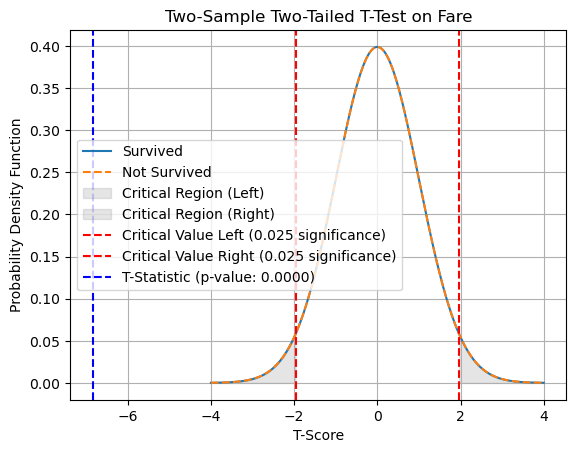

In [10]:
# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y_survived = t.pdf(x, df_survived)
y_not_survived = t.pdf(x, df_not_survived)

plt.plot(x, y_survived, label='Survived')
plt.plot(x, y_not_survived, label='Not Survived', linestyle='dashed')

# Shade the area for the critical regions
plt.fill_between(x, y_survived, where=(x < critical_value_left), color='gray', alpha=0.2, label='Critical Region (Left)')
plt.fill_between(x, y_not_survived, where=(x > critical_value_right), color='gray', alpha=0.2, label='Critical Region (Right)')

# Plot vertical lines for critical values and t-statistic
plt.axvline(critical_value_left, color='red', linestyle='--', label=f'Critical Value Left ({alpha/2} significance)')
plt.axvline(critical_value_right, color='red', linestyle='--', label=f'Critical Value Right ({alpha/2} significance)')
plt.axvline(t_statistic, color='blue', linestyle='--', label=f'T-Statistic (p-value: {p_value:.4f})')

# Set plot parameters
plt.title('Two-Sample Two-Tailed T-Test on Fare')
plt.xlabel('T-Score')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)